# Diabete: analisi e predizione

---



Questo progetto ha come obiettivo la visualizzazione e  descrizione dei dati presenti all'interno del dataset "Diabetes dataset 2019". Inoltre tali dati, una volta elaborati, vengono forniti a diversi modelli di classificazione binaria  per la previsione della presenza o meno di diabete nei soggetti e i risultati dei modelli vengono confrontati tra loro.

>Il dataset (`diabetes_dataset__2019.csv`) è stato ottenuto da Neha Prerna Tigga e Dr. Shruti Garg (Department of Computer Science and Engineering, BIT Mesra). Questo dataset ha una licenza a scopo di ricerca e non commerciale (https://www.sciencedirect.com/science/article/pii/S1877050920308024?via%3Dihub). Attribution 4.0 International (CC BY 4.0).


Secondo l'articolo, il dataset è stato ottenuto attraverso una survey condotta online e offline che prevedeva 18 domande (diventate poi le feature del dataset) poste a 952 soggetti indiani. Le diverse domande avevano lo scopo di raccogliere informazioni legate allo stile di vita (es. consumo di cibo spazzatura, fumo, alcool), a patologie (es. ipertensione) e a caratteristiche personali.

In [ ]:
 #Aggiornamenti necessari per GoogleColab che presenta versioni di alcuni package non aggiornati
 !pip install pandas==1.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib==3.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import delle dipendenze e dei package necessari per l'elaborazione e visualizzazione dei dati
import numpy as np #Algebra lineare e necessario per il funzionamento degli altri pacchetti
import pandas as pd #Elaborazione e manipolazione dei dati
import matplotlib.pyplot as plt #Generazione e visualizzazione di grafici
import seaborn as sns #Generazione e visualizzazione di grafici
import os
import sys

sns.set_theme(context = "notebook",style = "darkgrid",palette = "Paired") #Impostazione della palette dei colori, della visualizzazione e dei colori

## Informazioni sui dati

In [ ]:
#Caricamento del dataset in un dataframe di Pandas
data = pd.read_csv("diabetes_dataset__2019.csv")
data.shape #Informazioni sulla struttura del dataframe (952 istanze e 18 features)

(952, 18)

In [ ]:
#Feature del dataset (indici delle colonne)
data.columns

Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')

In [ ]:
#Alcuni indici sono scritti in maniera errata o poco rappresentativi
data.rename(columns={"Pregancies": "Pregnancies"}, inplace=True) 
data.rename(columns = {"UriationFreq":"FreqUrines"}, inplace=True)

Le 18 feature di questo dataset rappresentano le informazioni fornite dagli utenti durante la compilazione del questionario (la spiegazione è ottenuta dall'articolo di riferimento):
- *Age* (età dei partecipanti), divisa in 4 categorie: meno di 40 anni, 40-49, 50-59 e più di 60 anni;
- *Gender* (sesso): maschio o femmina;
- *Family_Diabetes*, familiarità della patologia: sì/no; 
- *highBP*, ipertensione diagnosticata: sì/no;
- *PhysicallyActive*, tempo di attività fisica quotidiana: nessuna attività fisica , meno di 30 minuti, 30-60 minuti, più di 60 minuti;; 
- *BMI* (Body Mass Index);
- *Smoking*, consumo di sostanze a base di nicotina e/o simili: sì/no;
- *Alcohol*, consumo di sostanze alcoliche: sì/no;
- *Sleep*, numero di ore di sonno quotidiane;
- *SoundSleep*, numero di ore di sonno profondo;
- *RegularMedicine*, regolare assunzione di farmaci: sì/no;
- *JunkFood*, consumo di cibo spazzatura: talvolta, spesso, molto spesso, sempre;
- *Stress*, livello di stress quotidiano: raramente/mai, talvolta, abbastanza spesso, continuamente;
- *BPLevel*, livello di pressione sanguigna: alto/basso;
- *Pregnancies*, numero di gravidanze;
- *PDiabetes*, diabete gestazionale: sì/no;
- *UrinationFreq*, minzione frequente: sì/no;
- *Diabetic*, diabete diagnosticato: sì/no;

*** 

**Diabetic** è la target variable dei modelli di machine learning mentre le altre feature, sebbene con rilevanza variabile, verranno impiegate per allenare i modelli di classificazione. 


In [ ]:
data.head(n=10) #visualizzazione delle prime 10 istanze del dataset

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,FreqUrines,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
5,40-49,Male,no,yes,none,21.0,no,yes,10,10,no,occasionally,sometimes,high,0.0,0,not much,yes
6,less than 40,Male,no,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
7,less than 40,Male,no,no,less than half an hr,20.0,no,no,7,7,yes,occasionally,sometimes,low,0.0,0,not much,no
8,40-49,Male,yes,no,one hr or more,23.0,no,no,7,7,no,occasionally,sometimes,normal,0.0,0,not much,no
9,less than 40,Male,no,no,more than half an hr,20.0,no,no,8,8,o,occasionally,sometimes,normal,0.0,0,not much,no


In [ ]:
data.tail(n=5) #visualizzazione delle ultime 5 istanze del dataset

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,FreqUrines,Diabetic
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no
951,60 or older,Female,yes,yes,one hr or more,30.0,no,no,7,4,yes,occasionally,sometimes,high,2.0,0,quite often,yes


Una panoramica veloce sui tipi di dato e sui dati presenti all'interno del dataset in questione:

In [ ]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print(f"-"*20)

Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64
--------------------
Gender
Male      580
Female    372
Name: Gender, dtype: int64
--------------------
Family_Diabetes
no     498
yes    454
Name: Family_Diabetes, dtype: int64
--------------------
highBP
no     724
yes    228
Name: highBP, dtype: int64
--------------------
PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64
--------------------
BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
--------------------
Smoking
no     844
yes    108
Name: Smoking, dtype: int64
----------

## Pre-processamento dei dati
***
Questo dataset contiene alcuni dati errati che possono essere sistemati, ad esempio nella feature *Diabetic* abbiamo un singolo valore " no" che può essere incorporato al resto dei "no", riducendo la complessità (ingiustificata) del dataset. Considerato che si tratta di un numero ridotto di errori, risulta quindi ottimale correggerli manualmente.

In [ ]:
data['RegularMedicine'].replace('o','no', inplace=True) #Presumibilmente la risposta era "no" invece di "o"
data['BPLevel'] = data['BPLevel'].str.lower().str.strip() #Qui sono presenti sia in maiuscolo che in minuscolo pertanto possono essere accorpati
data['Pdiabetes'].replace('0', 'no', inplace=True) #Nuovamente, la risposta probabilmente era "no" invece di 0
data['Diabetic'] = data['Diabetic'].str.strip() #Gli spazi vuoti vengono eliminati

#Il dataset ora dovrebbe essere migliorato
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print(f"-"*20)

Age
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64
--------------------
Gender
Male      580
Female    372
Name: Gender, dtype: int64
--------------------
Family_Diabetes
no     498
yes    454
Name: Family_Diabetes, dtype: int64
--------------------
highBP
no     724
yes    228
Name: highBP, dtype: int64
--------------------
PhysicallyActive
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64
--------------------
BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
--------------------
Smoking
no     844
yes    108
Name: Smoking, dtype: int64
----------

E' utile controllare quanti dati siano null in quanto la mancanza di dati potrebbe ostacolare l'analisi dei dati.

La funzione `data.isna() `restituisce un dataframe di tipo bool che indica se sono presenti o meno dati null.


In [ ]:
print("Numero totale di dati null: {}\n".format(data.isna().values.sum()))
print("Numero di dati null per ciascuna feature:")
pd.isna(data).sum()[pd.isna(data).sum() > 0] #In questo modo si selezionano le colonne contenenti dati null con il rispettivo numero di dati mancanti, creando un nuovo dataframe

Numero totale di dati null: 48

Numero di dati null per ciascuna feature:


BMI             4
Pregnancies    42
Pdiabetes       1
Diabetic        1
dtype: int64

<AxesSubplot: >

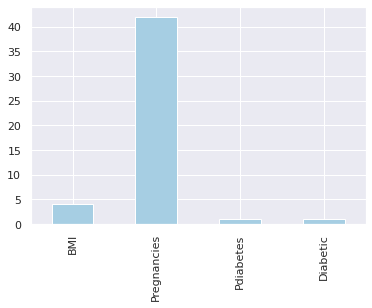

In [ ]:
data.isna().sum()[data.isna().sum()>0].plot(kind='bar')

Poiché i dati null sono relativamente pochi è preferibile mantenere queste features e riadattare i dati in maniera artificiale. 
> Ad esempio eliminando le istanze con dati null o complentandoli usando strumenti statistici

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)# L'iterative imputer cerca di predire il numero di gravidanze dai valori delle altre colonne
#in alternativa si può usare un SimpleImputer(usando per esempio la media o mediana), che è nella pipeline classica di pre-processamento dei dati di scikit-learn
data['Pregnancies'] = imp.fit_transform(data[['Pregnancies']])
data['Pregnancies'] = data['Pregnancies'].astype(int)
#La feature con il maggior numero di dati non disponibili è "Pregnancies" pertanto è ragionevole presupporre che se il genere è maschile, è possibile impostare il numero di gravidanze a 0
data.loc[data.Gender == 'Male', 'Pregnancies']=0

#Successivamente si eliminano tutte le istanze rimanenti contenenti dati null
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               947 non-null    object 
 1   Gender            947 non-null    object 
 2   Family_Diabetes   947 non-null    object 
 3   highBP            947 non-null    object 
 4   PhysicallyActive  947 non-null    object 
 5   BMI               947 non-null    float64
 6   Smoking           947 non-null    object 
 7   Alcohol           947 non-null    object 
 8   Sleep             947 non-null    int64  
 9   SoundSleep        947 non-null    int64  
 10  RegularMedicine   947 non-null    object 
 11  JunkFood          947 non-null    object 
 12  Stress            947 non-null    object 
 13  BPLevel           947 non-null    object 
 14  Pregnancies       947 non-null    int64  
 15  Pdiabetes         947 non-null    object 
 16  FreqUrines        947 non-null    object 
 1

Alcuni tipi di dato possono essere trasformati in tipi più semplici al fine di alleggerire il dataframe. <br>
Inoltre questo passaggio è utile nell'ottimizzazione dell'elaborazione da parte dei modelli in quanto generalmente si comportano meglio con dati "scaled".
> I dati "yes" o "no" vengono convertiti nei rispettivi booleani (True/False);
***
> I dati che rappresentano diversi livelli di una feature vengono convertiti nei corrispettivi ordinali [1-4]

In [ ]:
data.replace({'yes':True,'no':False},inplace = True) #Questo si applica alle feature "Family_Diabetes", "highBP", "Smoking", "Alcohol", "RegularMedicine", "Pdiabetes", "Diabetic"
data["PhysicallyActive"].replace({'none':0.0,'one hr or more':1.00,'less than half an hr':0.25,'more than half an hr':0.75},inplace = True) 
data["BPLevel"].replace({'low':1,'normal':2,'high':3},inplace = True)
data["FreqUrines"].replace({'not much':False,'quite often':True},inplace = True)
data["Stress"].replace({'not at all':0,'sometimes':1,'very often':2,'always':3},inplace = True)
data["JunkFood"].replace({'occasionally':1,'often':2,'very often':3,'always':4},inplace = True)
data["Age"].replace({'less than 40':1,'40-49':2,'50-59':3,'60 or older':4},inplace = True)
data["Gender"].replace({'Male':0,'Female':1},inplace = True)

#Il dataframe ora dovrebbe essere migliorato
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print(f"-"*20)

Age
1    484
2    164
3    155
4    144
Name: Age, dtype: int64
--------------------
Gender
0    578
1    369
Name: Gender, dtype: int64
--------------------
Family_Diabetes
False    496
True     451
Name: Family_Diabetes, dtype: int64
--------------------
highBP
False    721
True     226
Name: highBP, dtype: int64
--------------------
PhysicallyActive
0.25    336
0.75    269
1.00    211
0.00    131
Name: PhysicallyActive, dtype: int64
--------------------
BMI
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     47
19.0     36
25.0     34
30.0     33
18.0     32
29.0     28
38.0     28
36.0     20
17.0     16
32.0     16
31.0     16
34.0     12
35.0     12
15.0      8
39.0      4
40.0      4
42.0      3
45.0      1
Name: BMI, dtype: int64
--------------------
Smoking
False    839
True     108
Name: Smoking, dtype: int64
--------------------
Alcohol
False    755
True     192
Name: Alcohol, dtype: int64
--------------------
Sleep
7     

## Analisi dei dati
Una volta terminati i passaggi di pulizia e ottimizzazione dei dati,  è possibile proseguire con lo step di visualizzazione ed analisi. <br> 
***
<br>
Prima di concentrarsi sulle informazioni legate al diabete, si visualizzano alcune informazioni generali del campione in esame:

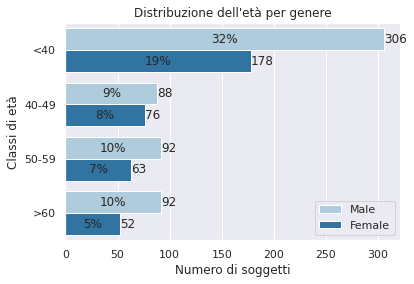

In [ ]:
#Individui di ciascun genere per ciascuna classe di età
gender = ['M', 'F']
age_group = ['<40', '40-49', '50-59','>60']
ax = sns.countplot(y='Age',hue='Gender',data=data)
plt.yticks(np.arange(4), age_group)
plt.title("Distribuzione dell'età per genere")
plt.xlabel("Numero di soggetti")
plt.ylabel("Classi di età")
plt.legend(labels=['Male','Female'])

for c in ax.containers:
    labels = [str(round((v.get_width()) * 100 / len(data))) + "%" for v in c]
    ax.bar_label(c, label_type='center', labels = labels, size = 12)
    ax.bar_label(c)

Text(0.5, 1.0, 'Soggetti fumatori, che bevono alcol e ipertesi')

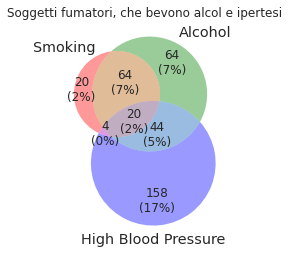

In [ ]:
#Soggetti che consumano alcol, fumano e soffrono di pressione alta
from matplotlib_venn import venn3
smoking = data[data['Smoking'] == True]
alcohol = data[data['Alcohol'] == True]
highBP = data[data['highBP'] == True]
venn3([set(smoking.index), set(alcohol.index), set(highBP.index)], set_labels = ('Smoking', 'Alcohol', 'High Blood Pressure'), subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/ len(data)):1.0%}" + ")")
plt.title("Soggetti fumatori, che bevono alcol e ipertesi")


Text(0.5, 1.0, "Distribuzione dell'attività fisica nel campione")

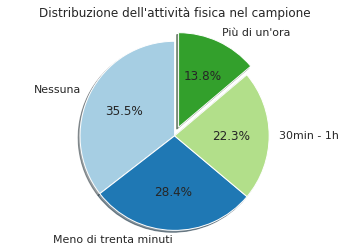

In [ ]:
#Distribuzione dell'attività fisica nel campione
labels = ['Nessuna', 'Meno di trenta minuti', '30min - 1h', 'Più di un\'ora']
sizes = data['PhysicallyActive'].value_counts()
explode = (0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribuzione dell'attività fisica nel campione")

Text(0, 0.5, 'Numero di soggetti')

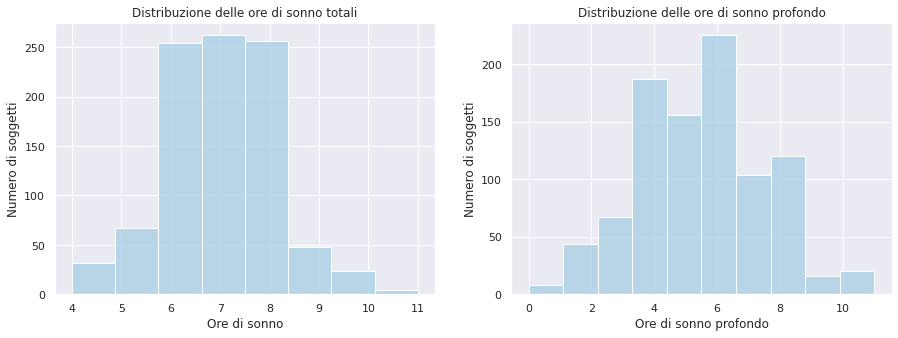

In [ ]:
#Distribuzione delle ore di sonno nel campione confrontate con le ore di sonno profondo
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=data, x="Sleep", ax=ax[0], bins=8)
ax[0].set_title("Distribuzione delle ore di sonno totali")
ax[0].set_xlabel("Ore di sonno")
ax[0].set_ylabel("Numero di soggetti")
sns.histplot(data=data, x="SoundSleep", ax=ax[1], bins=10)
ax[1].set_title("Distribuzione delle ore di sonno profondo")
ax[1].set_xlabel("Ore di sonno profondo")
ax[1].set_ylabel("Numero di soggetti")

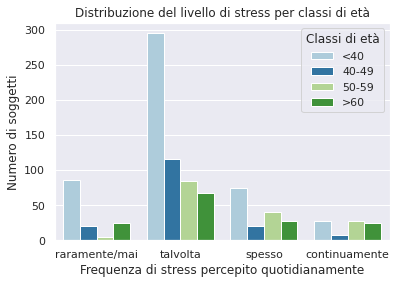

In [ ]:
#Distribuzione del livello di stress per classi di età
sns.countplot(x='Stress',hue='Age',data=data)
plt.title("Distribuzione del livello di stress per classi di età")
plt.xlabel("Frequenza di stress percepito quotidianamente")
plt.ylabel("Numero di soggetti")
plt.xticks(range(len(data["Stress"].unique())),labels=["raramente/mai", "talvolta", "spesso", "continuamente"])
plt.legend(title="Classi di età",labels=['<40', '40-49', '50-59','>60'])

Numero di diabetici: 265
Numero di soggetti non diabetici: 682


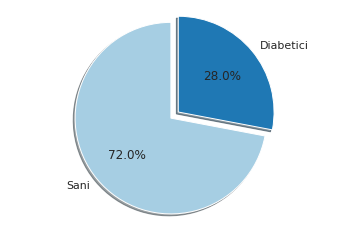

In [ ]:
#Percentuale totale di diabetici del campione
labels = ['Sani', 'Diabetici']
sizes = data['Diabetic'].value_counts()
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
print(f"Numero di diabetici: {data['Diabetic'].value_counts()[1]}")
print(f"Numero di soggetti non diabetici: {data['Diabetic'].value_counts()[0]}")

La funzione `describe()` fornisce alcune statistiche utili del dataset come i valori massimi e minimi di alcune categorie, le mediane e le deviazioni standard che consentono di capire come sia distribuito il campione.

In [ ]:
data.describe()

,Age,Gender,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,1.956705,0.389652,0.524551,25.769799,6.953537,5.498416,1.442450,1.214361,2.197466,0.352693
std,1.132466,0.487929,0.360206,5.402198,1.274218,1.867930,0.797468,0.797383,0.466730,0.885758
min,1.000000,0.000000,0.000000,15.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.250000,22.000000,6.000000,4.000000,1.000000,1.000000,2.000000,0.000000
50%,1.000000,0.000000,0.750000,25.000000,7.000000,6.000000,1.000000,1.000000,2.000000,0.000000
75%,3.000000,1.000000,0.750000,29.000000,8.000000,7.000000,2.000000,2.000000,2.000000,0.000000
max,4.000000,1.000000,1.000000,45.000000,11.000000,11.000000,4.000000,3.000000,3.000000,4.000000


Ad esempio, dall'output di questa funzione si evince che il BMI massimo è 45.0 (fascia di obesità di III grado) e il minimo è di 15.0 (sotto il livello considerato "Sottopeso"). 
Il valore medio è di circa 25,77 che ricade nella categoria "Sovrappeso" (utilizzando la scala per l'etnia asiatica ci si ritrova nella categoria "Pre-Obese").

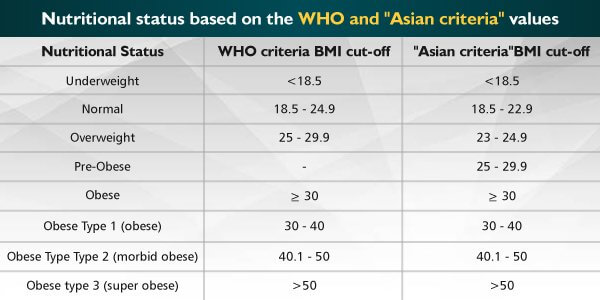

In [ ]:
#Per valori estremi di BMI (>40), a parità di altre condizioni (età, ipertensione, gravidanze, diabete gestazionale, assunzione di farmaci, familiarità della patologia), solo un soggetto su quattro è diabetico 
data[data["BMI"]>40]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,FreqUrines,Diabetic
146,3,1,False,True,0.75,42.0,False,False,7,3,True,1,3,3,0,False,False,False
384,3,1,False,True,0.75,42.0,False,False,7,3,True,1,3,3,0,False,False,False
622,3,1,False,True,0.75,42.0,False,False,7,3,True,1,3,3,0,False,False,False
860,3,1,False,True,0.75,45.0,False,False,7,3,True,1,3,3,0,False,False,True


Un boxplot consente di comparare i livelli di BMI tra i soggetti diabetici e sani. 
- Le linee nere al termine dei due baffi rappresentano i massimi (sopra) e minimi (sotto), escludendo i valori anomali/outlier (indicati con dei punti)
- I baffi rappresentano la variazione dei dati attesa 
- I box rappresentano il primo e terzo quartile (25% e 75%)
- La linea nera al centro della box è la mediana (per le due categorie)


<AxesSubplot: xlabel='Diabetic', ylabel='BMI'>

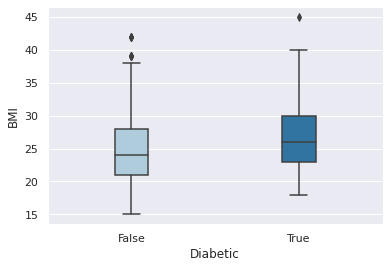

In [ ]:
sns.boxplot(x='Diabetic', y='BMI', data=data,width=0.2)
#Dall'osservazione di questo grafico non è osservabile una correlazione diretta tra BMI e diabete in quanto le mediane sono più o meno simili

La pairwise correlation (`corr`) è un indice statistico (r di Pearson) che mostra la correlazione tra le feature a coppie. 
>Un valore positivo si osserva quando è presente una correlazione positiva, mentre un valore negativo si osserva quando è presente una correlazione negativa. 

In [ ]:
#Pairwise correlation tra i dati (escludendo i valori nulli)
data.corr(numeric_only = True, method='pearson')

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,FreqUrines,Diabetic
Age,1.000000,0.009519,0.083174,0.424133,-0.223491,0.180833,-0.185858,0.010007,-0.143511,-0.039760,0.525861,-0.277244,0.184711,0.486179,0.194389,0.020146,0.124693,0.570412
Gender,0.009519,1.000000,0.096540,-0.025710,-0.048474,0.119085,-0.286669,-0.316755,0.068255,-0.016140,0.128918,-0.065918,0.094824,-0.027223,0.498611,0.135369,0.189261,0.037345
Family_Diabetes,0.083174,0.096540,1.000000,0.066316,0.028938,0.116231,-0.022842,0.029249,0.048070,0.058000,0.183335,0.009165,0.061876,0.103988,0.121648,0.023347,0.033671,0.258081
highBP,0.424133,-0.025710,0.066316,1.000000,-0.036460,0.147291,-0.013826,0.112018,-0.069053,-0.132218,0.451038,-0.111872,0.178904,0.671112,0.051185,0.034053,0.121325,0.373917
PhysicallyActive,-0.223491,-0.048474,0.028938,-0.036460,1.000000,0.002636,0.040126,-0.041685,0.023792,-0.093225,-0.071925,0.119463,-0.027544,-0.069737,-0.020542,-0.008354,-0.046565,-0.040876
BMI,0.180833,0.119085,0.116231,0.147291,0.002636,1.000000,-0.009314,-0.009632,-0.067896,-0.297961,0.182887,-0.037185,0.065455,0.159335,-0.055916,0.104074,0.256207,0.124163
Smoking,-0.185858,-0.286669,-0.022842,-0.013826,0.040126,-0.009314,1.000000,0.513156,-0.018213,-0.003254,-0.043111,0.267647,0.153602,0.047527,-0.142936,-0.016423,-0.034196,-0.009041
Alcohol,0.010007,-0.316755,0.029249,0.112018,-0.041685,-0.009632,0.513156,1.000000,-0.006350,0.067956,0.066360,0.115498,0.167559,0.169400,-0.200904,-0.061773,-0.103943,0.065952
Sleep,-0.143511,0.068255,0.048070,-0.069053,0.023792,-0.067896,-0.018213,-0.006350,1.000000,0.534251,-0.103070,0.038977,0.001490,-0.110756,0.053871,0.080043,-0.096820,-0.065915
SoundSleep,-0.039760,-0.016140,0.058000,-0.132218,-0.093225,-0.297961,-0.003254,0.067956,0.534251,1.000000,-0.114711,-0.102071,-0.055484,-0.144535,0.169647,0.032911,-0.285581,0.003679


<AxesSubplot: >

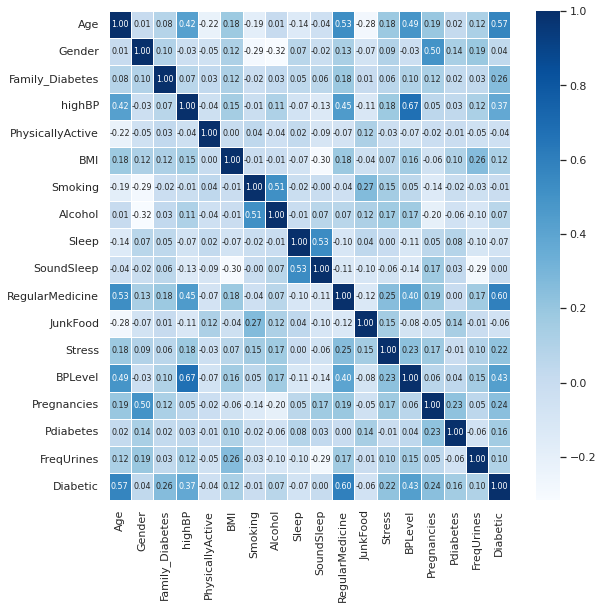

In [ ]:
#Poiché nessuna feature risulta determinante, è ottimale considerarne il più possibile al fine di non perdere informazioni potenzialmente utili ai fini della classificazione. 
plt.subplots(figsize = (9, 9))
sns.heatmap(data.corr(numeric_only = True), annot = True, annot_kws={"fontsize":8}, linewidths = 1, fmt = '.2f',cmap="Blues")

Per stabilire se esiste una correlazione tra il diabete e le altre feature, si utilizza il test (non parametrico) del chi-quadrato di indipendenza che determina se due variabili sono dipendenti o meno. 

La funzione `chi2` di `sklearn.feature_selection`, restituisce un valore chi2 e un p-value:
- Il chi2 è un indice che misura la dipendenza tra le due variabili casuali;
- Il p-value misura la probabilità che il valore chi2 sia stato ottenuto per caso. Se il p-value è inferiore ad un certo valore (ad esempio 0.05) allora si può affermare che le due variabili sono correlate.

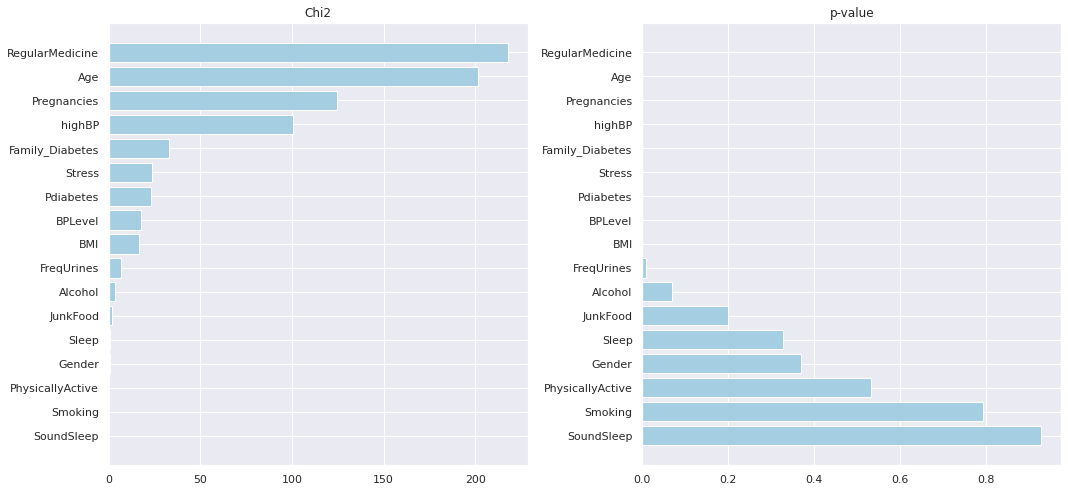

In [ ]:
from sklearn.feature_selection import chi2
chi2_values = pd.Series(chi2(data.drop("Diabetic",axis=1),data["Diabetic"])[0]) #Estrazione del chi2 (la funzione chi2 fornisce una tupla con chi2[0] e p-value[1])
chi2_values.index = data.drop("Diabetic",axis=1).columns
chi2_values.sort_values(ascending = True, inplace = True)

p_values = pd.Series(chi2(data.drop("Diabetic",axis=1),data["Diabetic"])[1]) #In questo modo ottengo solo il p-value (chi2 fornisce una tupla con chi2[0] e p-value[1])
p_values.index = data.drop("Diabetic",axis=1).columns
p_values.sort_values(ascending = False, inplace = True)

#Grafico dei valori chi2 e p-value
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].barh(chi2_values.index, chi2_values)
ax[0].set_title("Chi2")
ax[1].barh(p_values.index, p_values)
ax[1].set_title("p-value")
fig.tight_layout()

#Il grafico del chi2 è abbastanza speculare a quello del p-value, pertanto si può affermare che il diabete è correlato con diverse altre features.

In [ ]:
#Si può anche utilizzare la funzione sklearn.feature_selection.SelectKBest per selezionare le k features più importanti
from sklearn.feature_selection import SelectKBest

#Si utilizza la funzione chi2 per selezionare le k features più importanti
k_best_features = SelectKBest(chi2, k=5).fit(data.drop("Diabetic",axis=1),data["Diabetic"])

#Le features più importanti:
print("Feature più rilevanti: ",data.drop("Diabetic",axis=1).columns[k_best_features.get_support()], "\n")

#Le features meno importanti
print("Feature meno rilevanti: ",data.drop("Diabetic",axis=1).columns[~k_best_features.get_support()])

Feature più rilevanti:  Index(['Age', 'Family_Diabetes', 'highBP', 'RegularMedicine', 'Pregnancies'], dtype='object') 

Feature meno rilevanti:  Index(['Gender', 'PhysicallyActive', 'BMI', 'Smoking', 'Alcohol', 'Sleep',
       'SoundSleep', 'JunkFood', 'Stress', 'BPLevel', 'Pdiabetes',
       'FreqUrines'],
      dtype='object')


Sebbene la feature più importante sembra essere "RegularMedicine", è probabilmente legato al fatto che i soggetti diabetici tendano ad assumere farmaci (come l'insulina) in maniera regolare. In aggiunta, spesso i soggetti diabetici soffrono di altre patologie che richiedono l'assunzione di farmaci.

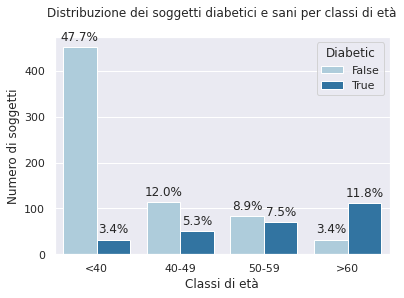

In [ ]:
#La distribuzione di soggetti diabetici e sani per classi di età
ax = sns.countplot(x='Age', hue='Diabetic', data=data)
plt.xticks(np.arange(4), age_group)
plt.title("Distribuzione dei soggetti diabetici e sani per classi di età", pad=20)
plt.xlabel("Classi di età")
plt.ylabel("Numero di soggetti")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center',va='center', xytext=(0, 10), textcoords='offset points')


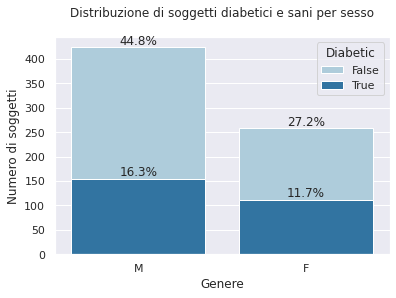

In [ ]:
#Distribuzione di soggetti diabetici e sani per genere
ax = sns.countplot(x='Gender',hue='Diabetic', data=data, dodge=False)
plt.xticks(np.arange(2),gender)
plt.title("Distribuzione di soggetti diabetici e sani per sesso", pad = 20)
plt.xlabel("Genere")
plt.ylabel("Numero di soggetti")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center',va='bottom')

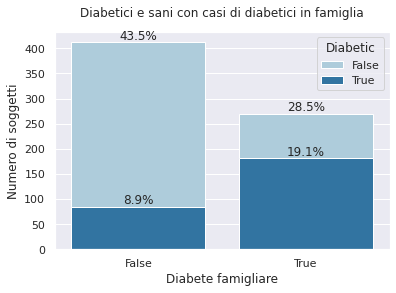

In [ ]:
#Percentuale di diabetici che presentano diabete famigliare
ax = sns.countplot(x='Family_Diabetes',hue='Diabetic',data=data, dodge=False)
plt.title("Diabetici e sani con casi di diabetici in famiglia",pad=15)
plt.xlabel("Diabete famigliare")
plt.ylabel("Numero di soggetti")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center',va='bottom')

Text(0, 0.5, 'BMI')

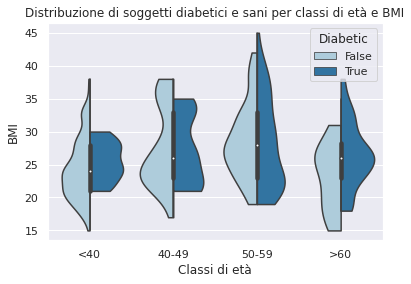

In [ ]:
#Distribuzione di soggetti diabetici e sani per classi di età e BMI
sns.violinplot(x='Age', y='BMI', hue='Diabetic', data=data,split=True,cut=0) #cut=0 non consente ai dati di andare oltre ai limiti (infatti il BMI minimo è 15 e il massimo è 45)
plt.xticks(np.arange(4), age_group)
plt.title("Distribuzione di soggetti diabetici e sani per classi di età e BMI")
plt.xlabel("Classi di età")
plt.ylabel("BMI")

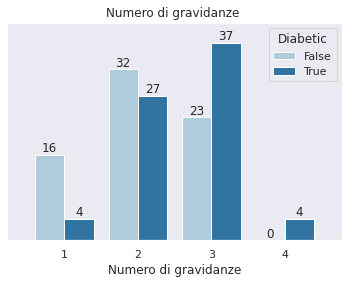

In [ ]:
#Soggetti diabetici e non con più di 1 gravidanza
ax = sns.countplot(x='Pregnancies', hue='Diabetic', data=data[(data['Pregnancies']>=1) & (data['Diabetic']>=0)])
plt.xlabel("Numero di gravidanze")
plt.margins(0.1)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Numero di gravidanze ")

for container in ax.containers:
    ax.bar_label(container)

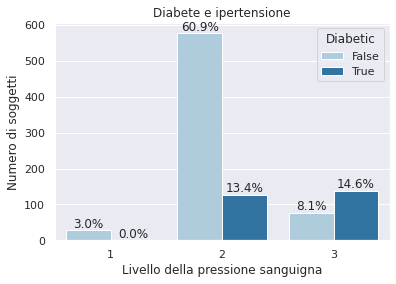

In [ ]:
#Percentuale di diabetici e non per i livelli di ipertensione
ax = sns.countplot(x='BPLevel', hue='Diabetic', data=data)
plt.title("Diabete e ipertensione")
plt.xlabel("Livello della pressione sanguigna")
plt.ylabel("Numero di soggetti")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center',va='bottom')
  

Uno dei sintomi più frequentemente correlato al diabete mellito è la frequente minzione.

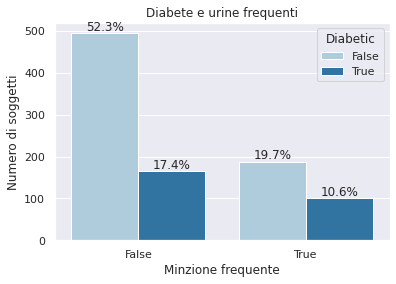

In [ ]:
#Diabete e urine frequenti
ax = sns.countplot(x='FreqUrines', hue='Diabetic', data=data)
plt.title("Diabete e urine frequenti")
plt.xlabel("Minzione frequente")
plt.ylabel("Numero di soggetti")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center',va='bottom')

Da queste analisi, si intuisce come non esista mai una diretta correlazione diretta tra diabete ed una particolare caratteristica in quanto si tratta di una patologia multifattoriale. Infatti, si osserva un'elevata variabilità dei dati.

## Applicazione dei modelli di machine learning

Terminata la visualizzazione e l'analisi dei dati, è possibile procedere all'applicazione di diversi modelli di machine learning (tipo apprendimento supervisionato) per la classificazione dei soggetti in diabetici e non diabetici. 

<br>

Tra i diversi metodi di classificazione binaria "semplice" applicabili, si possono utilizzare:
- K-Nearest Neighbors (KNN)
- Logistic Regression (LOG)
- Decision Tree (DTC)
- Perceptron
- Stochastic Gradient Descent (SGDC) 
- Support Vector Machine (SVM)
- Naive Bayes (BNB)
<br>

Successivamente si passa ai metodi di ensemble learning quali: 
- Random Forest (RFC)
- Voting (VFC)
- XGBoost (XGB)
- Stacking (STK)

<br>

In ultimo si vogliono osservare i risultati ottenuti da una rete neurale implementata con il package `Keras`.

***
I risultati dei vari modelli si confrontano tra loro per osservare quale sia il migliore.

> Nota: il numero massimo di iterazioni non viene trovato dalla grid search per ciascun modello in quanto è stato fatto offline per risparmiare tempo di calcolo.


In [ ]:
#Import delle librerie da utilizzare
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV #Divisione dei dati in train e test set; cross validation e ricerca dei parametri ottimali
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

Inizialmente il dataset viene diviso in un training set (80%), utilizzato per addestrare i modelli e in un test set, e in un test set (20%) impiegato per testarli.

In [ ]:
x = data.drop("Diabetic",axis=1)
y = data["Diabetic"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify = y)
# stratify = y permette di avere una distribuzione di dati simile tra train e test set (sebbene questo avvenga in maniera casuale durante lo split, questa opzione lo garantisce)
# random_state = 42 permette di avere sempre lo stesso risultato se la funzione viene chiamata diverse volte (42 è un parametro intero definito arbitrariamente)

#La divisione è:
print(f"Train set:\n{y_train.value_counts()}\n")
print(f"Test set:\n{y_test.value_counts()}")

Train set:
False    545
True     212
Name: Diabetic, dtype: int64

Test set:
False    137
True      53
Name: Diabetic, dtype: int64


Precedentemente, i dati sono stati trasformati nei corrispettivi ordinali. Ulteriormente, standardizzare i dati (attraverso `StandardScaler`) consente di migliorare (talvolta significativamente) i risultati dei modelli. 

In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Un classificatore binario divide le istanze in positives (istanza appartenente alla classe che si sta identificando) e negatives (istanza non appartenente alla classe che si sta identificando). 

> Pertanto si distinguono: 
- True positive (TP): il modello ha predetto l'istanza come positive ed era positive;
- False positive (FP): il modello ha predetto l'istanza come positive ma era in realtà negative;
- True negative (TN): il modello ha predetto l'istanza come negative ed era negative;
- False negative (FN): il modello ha predetto l'istanza come negative ma era in realtà positive;

Considerato ciò, l'efficacia di un modello di machine learning è descrivibile da una serie di parametri:
- Accuracy: è il numero di predizioni corrette (TP+TN) sul totale delle predizioni (TP+TN+FP+FN);
- Recall/Sensitivity: rapporto tra il numero di veri positivi (TP) e tutti i positive del dataset (TP+FN);
- Precision: è il rapporto tra il numero di veri positivi (TP) identificati e il numero totale di positivi identificati (TP+FP);
- F1 Score: è una media armonica tra Precision e Recall che consente di bilanciare le informazioni derivanti dalle due metriche;

Per ottimizzare il modello si usa la **cross-validation** (implementata attraverso `GridSearchCV`). 
Questo metodo permette di suddividere il training set in k (intero positivo) sottoinsiemi (fold) e utilizzare uno di questi come test set mentre gli altri come training set. 
Questo passaggio viene ripetuto per ciascun sottoinsieme e si ottiene così un punteggio di accuratezza per ogni sottoinsieme.
>L'accuratezza finale sarà data dalla media delle accuratezze e la deviazione standard permette di capire se il modello è stabile o meno tra le diverse iterazioni.

Inoltre `GridSearchCV` individua valori ottimali per i parametri e gli iperparametri applicando il modello con parametri variabili in maniera iterativa (**grid search**) sul training set diviso in k fold. 

### Applicazione del modello K-Nearest Neighbors (KNN)


---
Il k-nearest neighbors effettua il riconoscimento di pattern per la classificazione di oggetti basandosi sulle caratteristiche degli oggetti vicini a quello considerato.

Questo modello utilizza un iperparametro K, ovvero il numero di oggetti vicini da considerare per la classificazione. 
> Un valore di K piccolo indica che il modello è complicato e può condurre all'overfitting mentre se K è grande, può condurre ad underfitting.

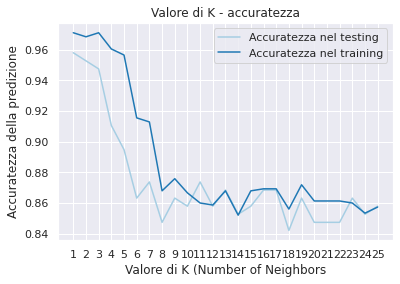

L'accuratezza migliore (95.7895%) si ottiene con un valore di K: 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Per verificare i valori di k, è utile settare un range e testare il modello con i vari valori (grid search manuale)
k_range = np.arange(1, 26)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    #accuratezza nel train
    train_accuracy.append(knn.score(x_train, y_train))
    #accuratezza nel test
    test_accuracy.append(knn.score(x_test, y_test))

#Per una migliore visualizzazione, si plottano le informazioni
plt.plot(k_range, test_accuracy, label = "Accuratezza nel testing")
plt.plot(k_range, train_accuracy, label = "Accuratezza nel training")
plt.legend()
plt.title("Valore di K - accuratezza")
plt.xlabel("Valore di K (Number of Neighbors")
plt.ylabel("Accuratezza della predizione")
plt.xticks(k_range)
plt.show()
print(f"L'accuratezza migliore ({round(np.max(test_accuracy)*100,4)}%) si ottiene con un valore di K: {1 + test_accuracy.index(np.max(test_accuracy))}")

In [ ]:
#Grid search per KNN
param_grid = {'n_neighbors': np.arange(1, 26)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5) #Questa funzione effettua automaticamente la cross validation e la grid search per trovare il parametro ottimale
knn_cv.fit(x_train, y_train)
print("Migliore valore per K {}\n".format(knn_cv.best_params_))
print("L'accuratezza media è: {:.4f}%".format(knn_cv.best_score_*100))
print("La deviazione standard è {:.4f}".format(knn_cv.cv_results_['std_test_score'][knn_cv.best_index_]))

Migliore valore per K {'n_neighbors': 1}

L'accuratezza media è: 93.1379%
La deviazione standard è 0.0236


In [ ]:
#Si utilizza il valore di K trovato per addestrare il modello (identico a quello ottenuto dalla grid search con cross-validation)
knn = KNeighborsClassifier(n_neighbors = 1 + test_accuracy.index(np.max(test_accuracy)))
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

print("Punteggio nel train: {:.4f}%".format(knn.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(knn.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       137
        True       0.96      0.89      0.92        53

    accuracy                           0.96       190
   macro avg       0.96      0.94      0.95       190
weighted avg       0.96      0.96      0.96       190

Punteggio nel train: 97.0938%
Punteggio nel test: 95.7895%


Text(30.5, 0.5, 'Valore reale')

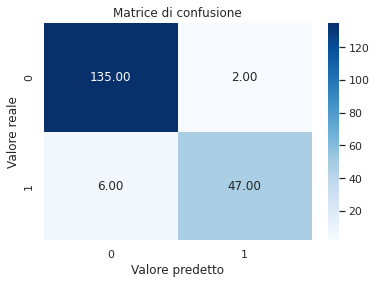

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")

### Applicazione della regressione logistica

La regressione logistica è un modello di ML utilizzata per valutare la probabilità dell'avvenimento di un evento con esito binario che dipende da altre variabili (trattate tra loro come indipendenti). 
> Questa assunzione non è completamente valida nel caso del nostro dataset poiché la quantità di sonno profondo e il diabete gestazionale dipendono da altre caratteristiche.  

L'iperparametro di regolarizzazione *C* (presente anche in SVM) indica al modello quanto considerare i valori estremi presenti nel dataset.
> Un valore ridotto indica una maggiore valutazione dei valori estremi (ma può condurre ad overfitting) mentre un valore maggiore rende il modello meno complesso (ma può condurre all'underfitting). 

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
param_grid = {'C': np.arange(0.000001, 3, 0.1)} 

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(x_train, y_train)
print("Migliore valore per C: {}\n".format(logreg_cv.best_params_))
print("L'accuratezza media è: {:.4f}%".format(logreg_cv.best_score_*100))
print("La deviazione standard è {:.4f}".format(logreg_cv.cv_results_['std_test_score'][logreg_cv.best_index_]))

Migliore valore per C: {'C': 0.200001}

L'accuratezza media è: 87.5828%
La deviazione standard è 0.0159


In [ ]:
#Si utilizza il valore di C trovato per addestrare il modello
logreg = LogisticRegression(max_iter = 1000, C = logreg_cv.best_params_['C'])
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print(classification_report(y_test, y_pred_log))

print("Punteggio nel train: {:.4f}%".format(logreg.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(logreg.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.91      0.91      0.91       137
        True       0.77      0.75      0.76        53

    accuracy                           0.87       190
   macro avg       0.84      0.83      0.84       190
weighted avg       0.87      0.87      0.87       190

Punteggio nel train: 88.2431%
Punteggio nel test: 86.8421%


Text(30.5, 0.5, 'Valore reale')

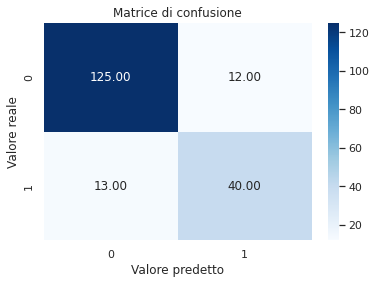

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")
#Anche qui non è presente un metodo diretto per stabilire la feature relevance

### Applicazione del perceptron
Il percettrone (single layer) è un modello di machine learning semplice che prende in input i dati e i pesi di ciascun dato (determinati automaticamente dalla funzione di scikit-learn utilizzando i dati forniti).
Anche questo metodo usa un parametro di regolarizzazione (alpha).

> La rete neurale realizzata è un multi-layer perceptron.

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter = 200)
param_grid = {'alpha': np.arange(0.000001, 3, 0.1)} #alpha è il parametro di regolarizzazione, se è piccolo, il modello è più complesso e può condurre all'overfitting, se è grande, può condurre ad underfitting
perceptron_cv = GridSearchCV(perceptron, param_grid, cv=5)
perceptron_cv.fit(x_train, y_train)
print("Migliore valore per alpha: {}\n".format(perceptron_cv.best_params_))
print("L'accuratezza media è {:.4f}%".format(perceptron_cv.best_score_*100))
print("La deviazione standard è {:.4f}".format(perceptron_cv.cv_results_['std_test_score'][perceptron_cv.best_index_]))

Migliore valore per alpha: {'alpha': 1e-06}

L'accuratezza media è 80.4444%
La deviazione standard è 0.0583


In [ ]:
#Il valore di alpha trovato viene impiegato per addestrare il modello
perceptron = Perceptron(max_iter = 200, alpha = perceptron_cv.best_params_['alpha'])
perceptron.fit(x_train, y_train)
y_pred_perceptron = perceptron.predict(x_test)
print(classification_report(y_test, y_pred_perceptron))

print("Punteggio nel train: {:.4f}%".format(perceptron.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(perceptron.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.86      0.94      0.90       137
        True       0.80      0.60      0.69        53

    accuracy                           0.85       190
   macro avg       0.83      0.77      0.79       190
weighted avg       0.84      0.85      0.84       190

Punteggio nel train: 85.4690%
Punteggio nel test: 84.7368%


Text(30.5, 0.5, 'Valore reale')

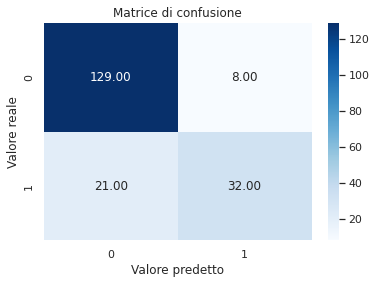

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_perceptron)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")

### Applicazione di un Decision Tree

Un albero decisionale (decision tree) è un modello usato per la classificazione (o anche per la regressione) rappresentabile come un albero dove ogni nodo rappresenta un range di valori per certe features e usa una regola di decisione per andare nel nodo successivo fino ad arrivare ad un nodo foglia terminale.
Il classificatore DecisionTreeClassifier di scikit-learn è basato sull'algoritmo CART dove ogni nodo può avere solo due nodi figli.

Utilizza diversi parametri:
- `max_depth` indica la profondità massima dell'albero;
- `criterion` è il criterio di definizione dell'impurità per definire la qualità dello split dei dati; 
- `min_samples_leaf` è il numero minimo di dati presenti in una foglia;


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
param_grid =  {
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [1,2,3,4,5],
    'criterion': ["gini", "entropy"]
}
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5)
CV_dtc.fit(x_train, y_train),

print("Parametri migliori:",CV_dtc.best_params_,"\n")
print("L'accuratezza media è {:.4f}%".format(CV_dtc.best_score_*100))
print("La deviazione standard è {:.4f}".format(CV_dtc.cv_results_['std_test_score'][CV_dtc.best_index_]))

Parametri migliori: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1} 

L'accuratezza media è 95.9106%
La deviazione standard è 0.0217


In [ ]:
dtc = DecisionTreeClassifier(max_depth=CV_dtc.best_params_['max_depth'], min_samples_leaf=CV_dtc.best_params_['min_samples_leaf'], criterion=CV_dtc.best_params_['criterion'])
clf=dtc.fit(x_train, y_train)  

#Classification report
y_pred_dtc = dtc.predict(x_test)
print(classification_report(y_test, y_pred_dtc))

print("Punteggio nel train: {:.4f}%".format(dtc.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(dtc.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       137
        True       1.00      0.89      0.94        53

    accuracy                           0.97       190
   macro avg       0.98      0.94      0.96       190
weighted avg       0.97      0.97      0.97       190

Punteggio nel train: 97.7543%
Punteggio nel test: 96.8421%


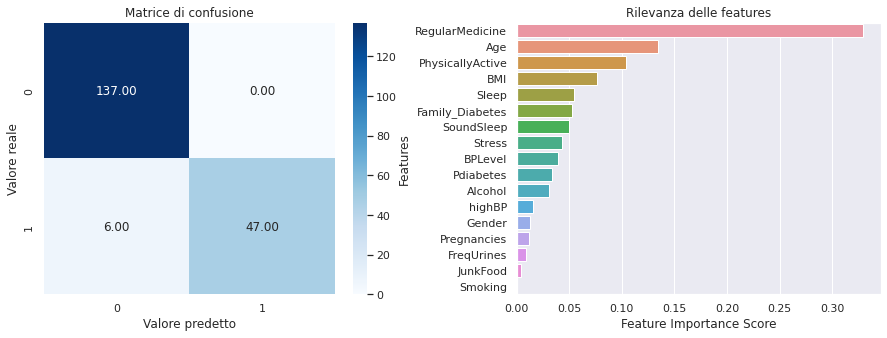

In [ ]:
f,ax = plt.subplots(1,2,figsize=(15,5))

#matrice di confusione
cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", ax=ax[0])
ax[0].set_title("Matrice di confusione")
ax[0].set_xlabel("Valore predetto")
ax[0].set_ylabel("Valore reale")

#Importanza delle features nella predizione secondo questo modello
feature_imp = pd.Series(dtc.feature_importances_,index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax[1])
ax[1].set_xlabel('Feature Importance Score')
ax[1].set_ylabel('Features')
ax[1].set_title("Rilevanza delle features")

plt.subplots_adjust(wspace=0.3)

Il DecisionTree è un white box model (rispetto, ad esempio, alle reti neurali che sono considerabili black box model) per cui è possibile vedere in chiaro le regole di decisione ed è quindi utile nel campo dell'Interpletable ML/Explainable AI.


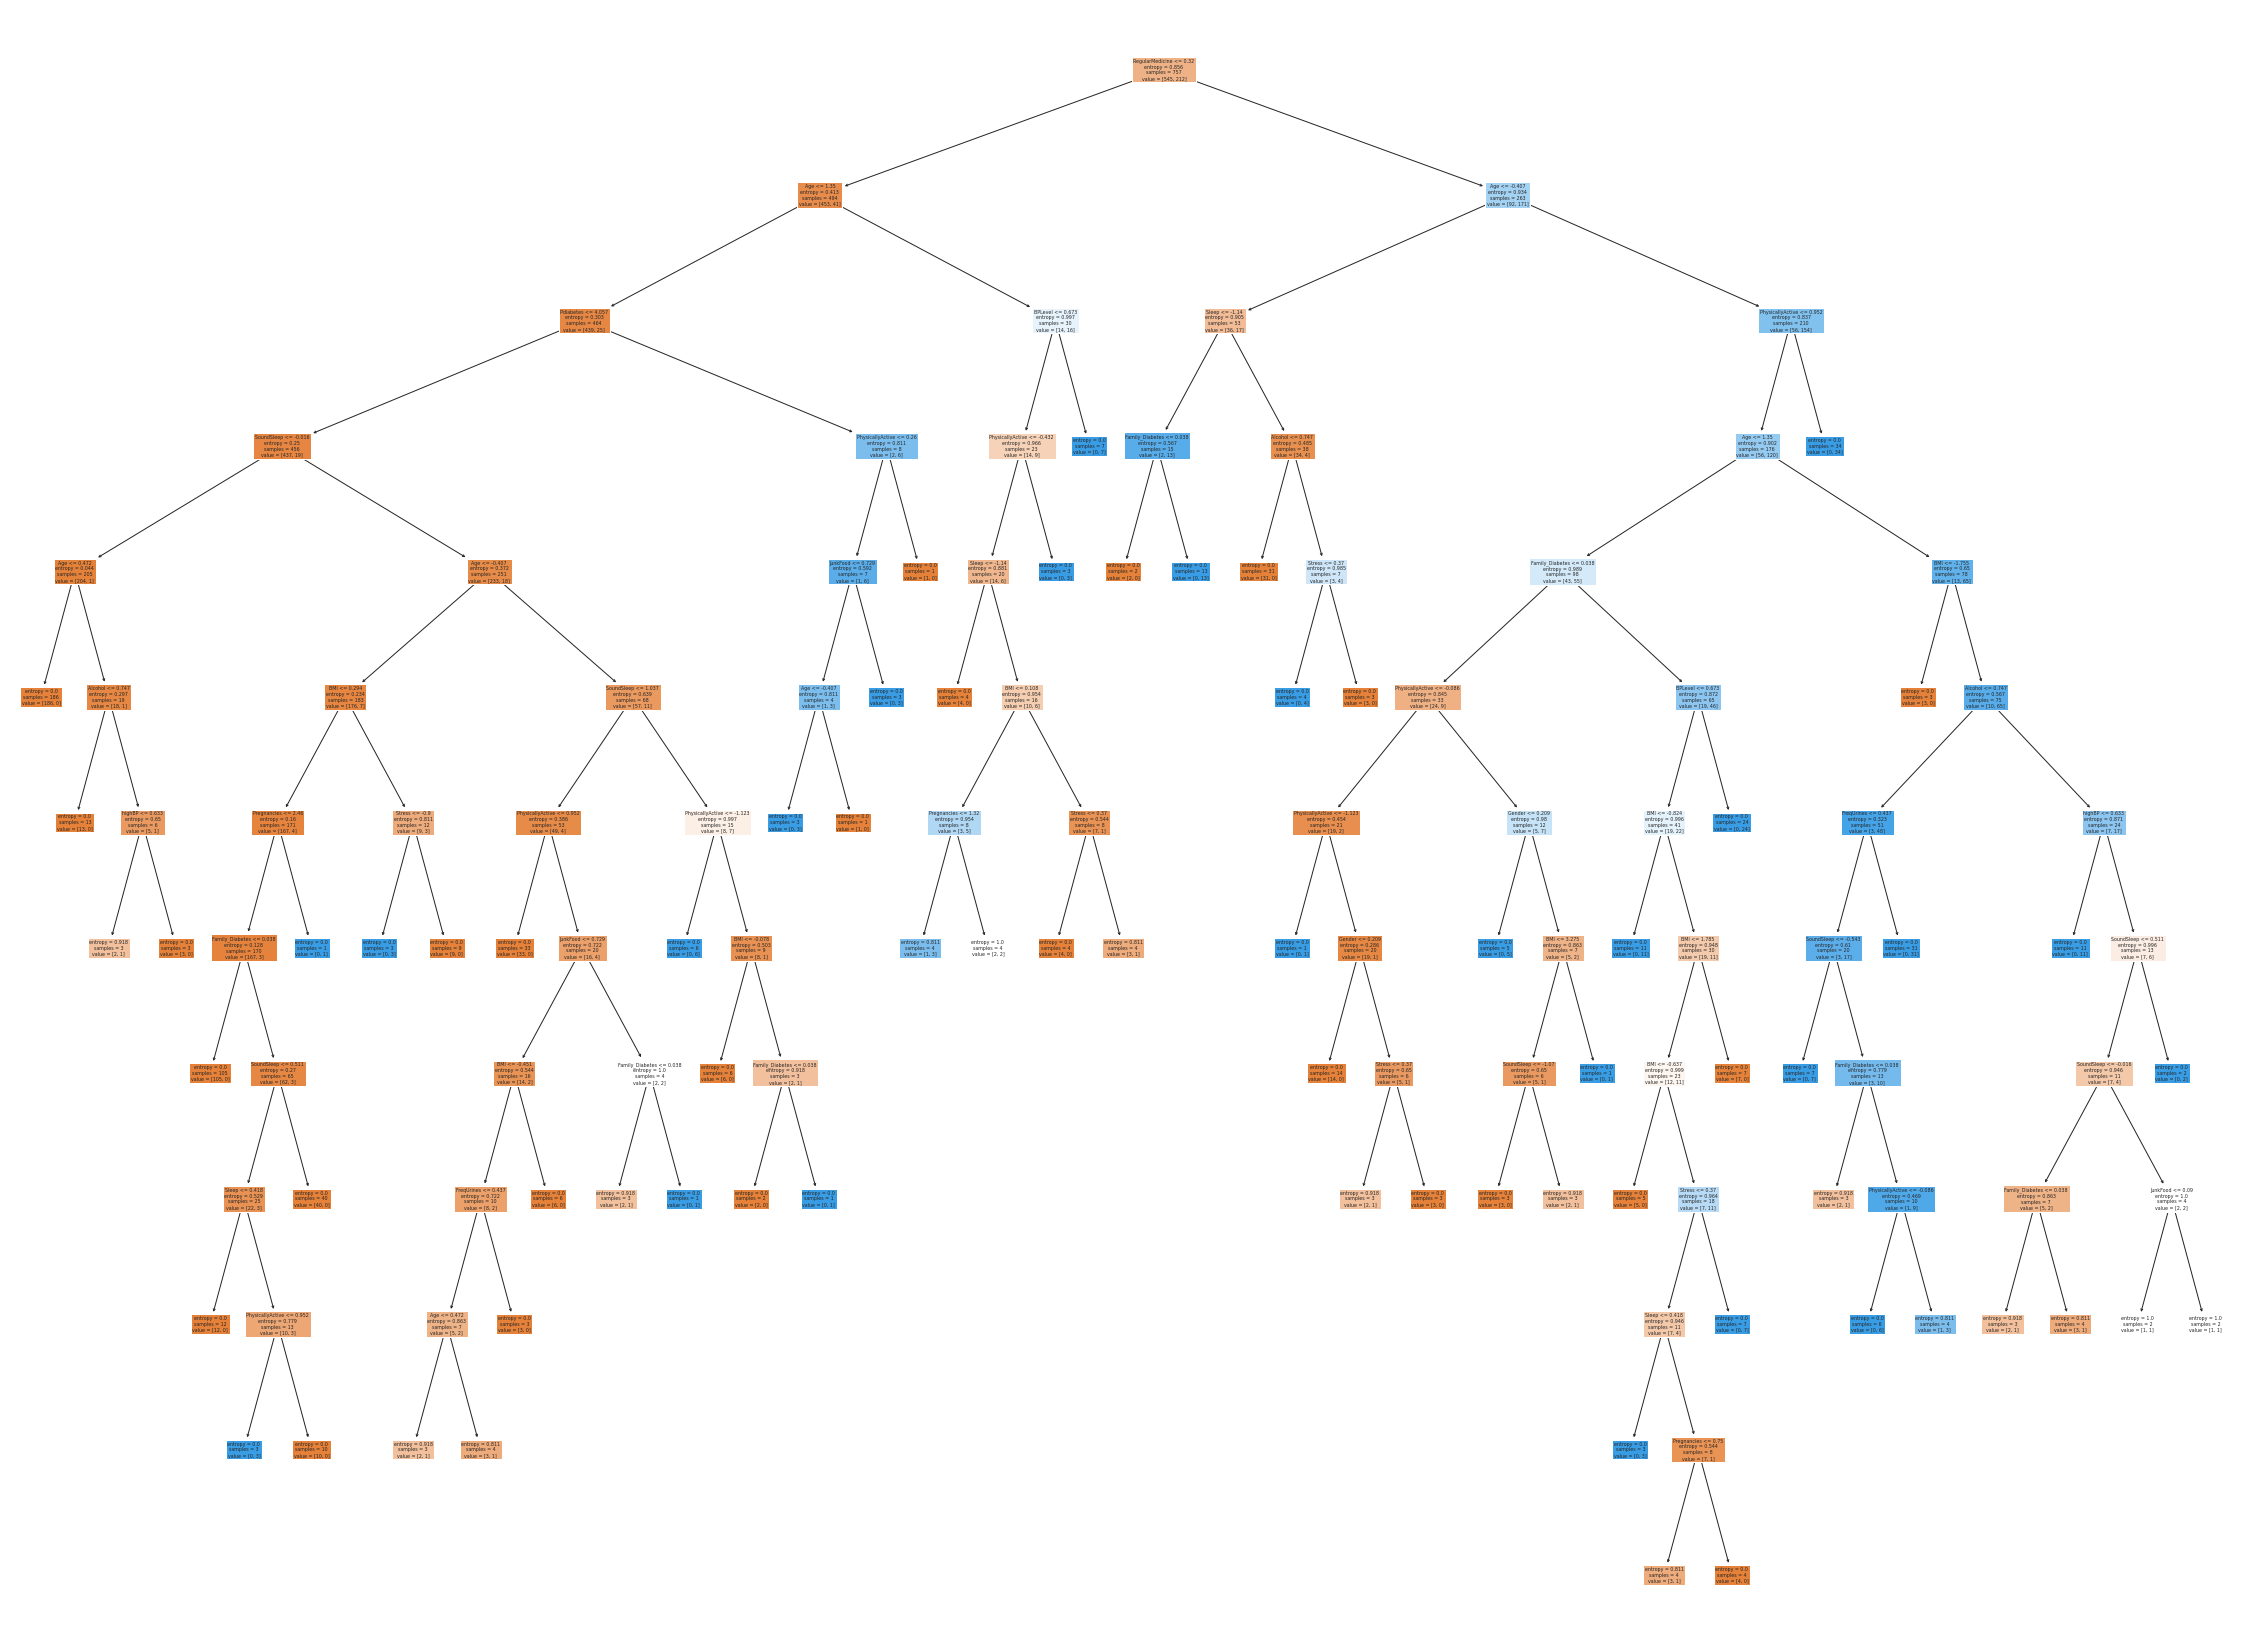

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,30))
tree.plot_tree(dtc,feature_names=x.columns,filled=True)
plt.show()

### Applicazione di un Stochastic Gradient Descent Classifier
Lo Stochastic Gradient Descent Classifier (SGDC) è un algoritmo di classificazione supervisionato: durante ogni iterazione viene selezionato un esempio casuale dal set (stochastic) e vengono calcolati i gradienti rispetto ai pesi del modello (gradient), i pesi vengono in seguito aggiornati nella direzione opposta ai gradienti (descent), questo processo continuerà fino alla convergenza o il raggiungimento del numero massimo di iterazioni impostato.

Tra i suoi iperparametri:
- loss: funzione di perdita da ottimizzare;
- alpha: parametro di regolarizzazione della penalità;
- penalty: penalità da applicare ai pesi;







In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
param = {
    "loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}
CV_sgdc = GridSearchCV(estimator = sgdc, param_grid = param, cv = 5) #Applico una grid search per ceracre i valori degli iperparametri ottimali-
#CV_sgdc.fit(x_train, y_train)
#print(CV_sgdc.best_params_)
#{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'} <- Valori ottimali trovati con la grid search
print("Parametri migliori: {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'} \n")

Parametri migliori: {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'} 



In [ ]:
CV_sgdc.best_params = {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}
sgdc = SGDClassifier(alpha = CV_sgdc.best_params['alpha'], loss = CV_sgdc.best_params['loss'], penalty = CV_sgdc.best_params['penalty'])
sgdc.fit(x_train, y_train)
y_pred_sgdc = sgdc.predict(x_test)
print(classification_report(y_test, y_pred_sgdc))

print("Punteggio nel train: {:.4f}%".format(sgdc.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(sgdc.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.93      0.91      0.92       137
        True       0.79      0.83      0.81        53

    accuracy                           0.89       190
   macro avg       0.86      0.87      0.86       190
weighted avg       0.89      0.89      0.89       190

Punteggio nel train: 90.2246%
Punteggio nel test: 88.9474%


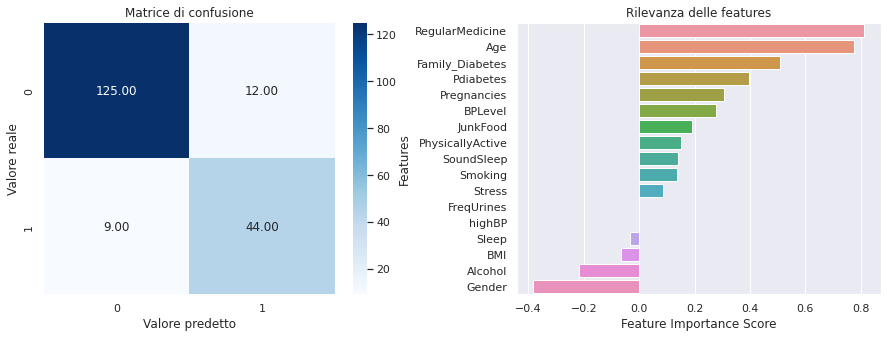

In [ ]:
f,ax = plt.subplots(1,2,figsize=(15,5))
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_sgdc)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",ax = ax[0])
ax[0].set_title("Matrice di confusione")
ax[0].set_xlabel("Valore predetto")
ax[0].set_ylabel("Valore reale")

#Rilevanza delle feature
feature_imp = pd.Series(sgdc.coef_[0],index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,ax = ax[1])
ax[1].set_xlabel('Feature Importance Score')
ax[1].set_ylabel('Features')
ax[1].set_title("Rilevanza delle features")

plt.subplots_adjust(wspace=0.3)

In [ ]:
#Accuratezza attraverso cross validation
accuracies = cross_val_score(estimator = sgdc, X = x_train, y = y_train, cv = 5)
print("L'accuratezza media è {:.4f}%".format(accuracies.mean()*100))
print("La deviazione standard è {:.4f}".format(accuracies.std()))

L'accuratezza media è 88.2459%
La deviazione standard è 0.0157


### Applicazione del modello Support-Vector Machine 

Le Support-Vector Machine o SVM (in italiano Macchine a vettori di supporto) sono modelli di classificazione il cui obiettivo è quello di trovare l'iperpiano di n-1-dimensioni (con n il numero di features) di separazione delle classi che massimizza il margine tra le classi stesse, dove con margine si intende la distanza minima dall'iperpiano dei punti delle due classi.
Al tempo stesso si cerca di minimizzare la misclassification ed è per quello che si introduce il parametro C che sceglie il costo della penalità dovuta a classificazioni errate.

> Si possono usare funzioni lineari ma spesso le classi non sono linearmente separabili e si utilizzano funzioni con kernel non lineari per avere una performance migliore.

A tal fine usa i vettori di supporto, ovvero i valori di una classe più vicini all'iperpiano di separazione, quelli che più si avvicinano all’altra classe. In sostanza sono i valori classificabili con maggiore difficoltà.
> Anche questo modello necessita di un iperparametro di regolarizzazione (C) e di un parametro di kernel (gamma);

In [ ]:
from sklearn.svm import SVC
svm = SVC()
param_grid = {'C': np.arange(0.000001, 3, 0.1), 'gamma': np.arange(0.000001, 3, 0.1)} #C è il parametro di regolarizzazione, se è piccolo, il modello è più complesso e può condurre all'overfitting, se è grande, può condurre ad underfitting
#gamma è il parametro di kernel, se è piccolo, il modello è più complesso e può condurre all'overfitting, se è grande, può condurre ad underfitting

svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(x_train, y_train)
print("Migliore valore per C e gamma {}\n".format(svm_cv.best_params_))
print("L'accuratezza media è {:.4f}%".format(svm_cv.best_score_*100))
print("La deviazione standard è {:.4f}".format(svm_cv.cv_results_['std_test_score'][svm_cv.best_index_]))

Migliore valore per C e gamma {'C': 1.700001, 'gamma': 1.500001}

L'accuratezza media è 94.9878%
La deviazione standard è 0.0339


In [ ]:
svm = SVC(C = svm_cv.best_params_['C'], gamma = svm_cv.best_params_['gamma'], probability=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))

print("Punteggio nel train: {:.4f}%".format(svm.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(svm.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       137
        True       1.00      0.89      0.94        53

    accuracy                           0.97       190
   macro avg       0.98      0.94      0.96       190
weighted avg       0.97      0.97      0.97       190

Punteggio nel train: 97.7543%
Punteggio nel test: 96.8421%


Text(30.5, 0.5, 'Valore reale')

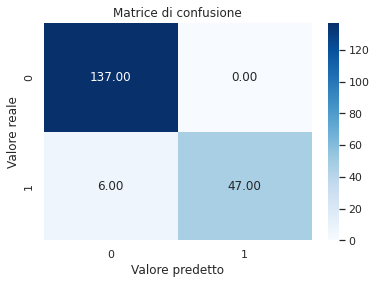

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")
#Con il kernel utilizzato non è possibile stabilire la feature importance perchè non è lineare e i dati vengono trasferiti in uno spazio non correlato ai dati di partenza

### Applicazione del modello Naive Bayes (Bernoulliano)

Naive Bayes è un algoritmo di classificazione di Machine Learning basato sul teorema di Bayes che fornisce la probabilità di accadimento di un evento. Il classificatore Naive Bayes è un classificatore probabilistico, il che significa che, dato un input, prevede la probabilità che l'input sia classificato per tutte le classi.

Il classificatore Naive Bayes si basa su due assunzioni importanti:
- Le feature vengono considerate indipendenti tra loro pertanto non si influenzano a vicenda (definito naive); 
- Tutte le caratteristiche hanno la stessa importanza pertanto tutte le caratteristiche sono necessarie per predire il risultato;

*** 
Poiché questo dataset è composto principalmente da dati binari si applica la variante bernoulliana del modello Naive Bayes.

Questo necessita di ulteriore processamento dei dati:

<AxesSubplot: >

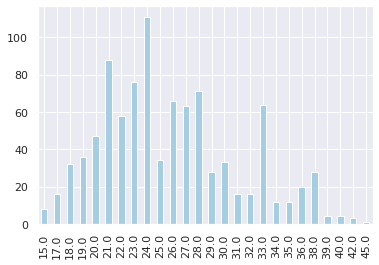

In [ ]:
data['BMI'].value_counts().sort_index().plot(kind='bar')
#prima del taglio

<AxesSubplot: >

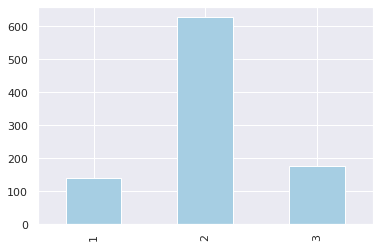

In [ ]:
from sklearn.naive_bayes import BernoulliNB

data_copy = data.copy()
data_copy['BMI'] = pd.cut(data_copy['BMI'], bins=[10,20,30,40], labels=[1, 2, 3])
data_copy['BMI'].value_counts().sort_index().plot(kind='bar')
#dopo il taglio

In [ ]:
#Il cut divide i valori di BMI in 3 classi primarie
data_copy=pd.get_dummies(data_copy,columns=['Family_Diabetes','PhysicallyActive','Age','BPLevel','Smoking','Alcohol','RegularMedicine','BMI','Pregnancies','Stress','JunkFood','Sleep','SoundSleep'],drop_first=True) #La trasformazione è necessaria solo per alcune features e avviene su una copia del dataframe (data_copy)
#La funzione get_dummies trasforma il dataframe con features solo binarie/bernoulliane

from sklearn.preprocessing import StandardScaler
xc = data_copy.drop("Diabetic",axis=1)
yc = data_copy["Diabetic"]
xc_train, xc_test, yc_train, yc_test = train_test_split(xc,yc,test_size=0.2,random_state=42,stratify = y)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
bnb = BernoulliNB()
bnb_cv = GridSearchCV(bnb, param_grid, cv=5)
bnb_cv.fit(x_train, y_train)
print("Migliore valore per alpha {}\n".format(bnb_cv.best_params_))
print("L'accuratezza media è {:.4f}%".format(bnb_cv.best_score_*100))
print("La deviazione standard è {:.4f}".format(bnb_cv.cv_results_['std_test_score'][bnb_cv.best_index_]))

Migliore valore per alpha {'alpha': 10}

L'accuratezza media è 85.0732%
La deviazione standard è 0.0223


In [ ]:
#Usa il valore di alpha migliore trovato per addestrare il modello
bnb = BernoulliNB(alpha = bnb_cv.best_params_['alpha'])
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(classification_report(y_test, y_pred_bnb))

print("Punteggio nel train: {:.4f}%".format(bnb.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(bnb.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.89      0.88      0.88       137
        True       0.69      0.72      0.70        53

    accuracy                           0.83       190
   macro avg       0.79      0.80      0.79       190
weighted avg       0.83      0.83      0.83       190

Punteggio nel train: 85.6011%
Punteggio nel test: 83.1579%


Text(30.5, 0.5, 'Valore reale')

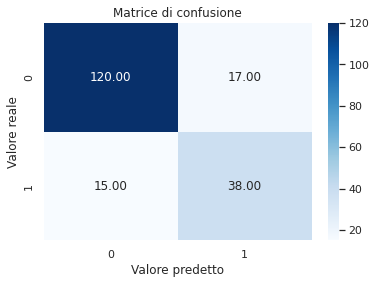

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_bnb)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")

## Applicazione di metodi di ensemble learning
I metodi di ensemble learning usano un insieme, omogeneo o no, di predittori/modelli diversi. Pertanto, sono generalmente più efficaci dei modelli singoli. 

### Applicazione di RandomForest
Il random forest è un algoritmo di apprendimento supervisionato basato sulla creazione di molteplici decision tree su un subset di feature (scelte casualmente pertanto detto random) e una combinazione di questi, determinati casualmente dal training set iniziale. 

Uno dei principali punti di forza del RandomForest è la sua capacità di prevenire l'overfitting che è spesso un problema per decision tree singoli, questo è possibile proprio grazie all'elemento di casualità.

Tra i suoi iperparametri:

*   n_estimators: numero di alberi di decisione, direttamente proporzionale sia alla precisione della classificazione che al tempo di addestramento;
*   max_features: numero massimo di features considerate ad ogni split, aumentando aumenta anche la complessità dell'albero e potrebbe causare overfitting;
*   max_depth: profondità massima dei decision tree. Una depth maggiore aumenta la complessità dell'albero e la probabilità che avvenga overfitting;
*   criterion: è il criterio di definizione dell'impurità per definire la qualità dello split dei dati;






In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [5,10,20,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,4,8,16],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
print("Parametri migliori:",CV_rfc.best_params_,"\n")
print("L'accuratezza media è {:.4f}%".format(CV_rfc.best_score_*100))
print("La deviazione standard è {:.4f}".format(CV_rfc.cv_results_['std_test_score'][CV_rfc.best_index_]))
#{'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 800} per compilare velocemente

Parametri migliori: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 20} 

L'accuratezza media è 94.5922%
La deviazione standard è 0.0283


In [ ]:
#CV_rfc.best_params_= {'criterion': 'gini', 'max_depth': 17, 'max_features': 'log2', 'n_estimators': 800}
rfc = RandomForestClassifier(n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], max_features=CV_rfc.best_params_['max_features'], criterion=CV_rfc.best_params_['criterion'])
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))

print("Punteggio nel train: {:.4f}%".format(rfc.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(rfc.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       137
        True       0.96      0.89      0.92        53

    accuracy                           0.96       190
   macro avg       0.96      0.94      0.95       190
weighted avg       0.96      0.96      0.96       190

Punteggio nel train: 97.7543%
Punteggio nel test: 95.7895%


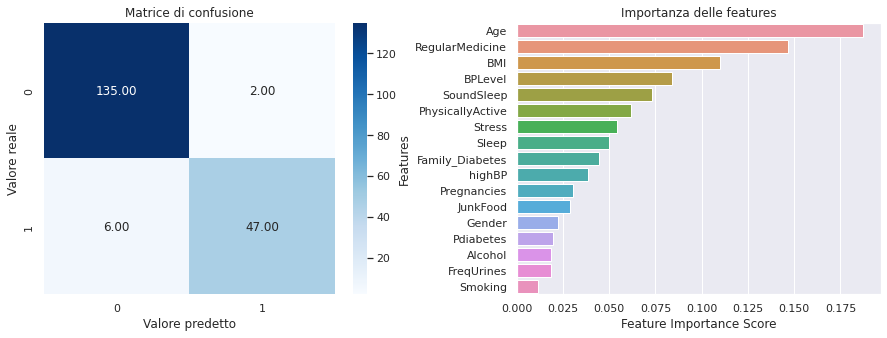

In [ ]:
f,ax = plt.subplots(1,2,figsize=(15,5))
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",ax=ax[0])
ax[0].set_title("Matrice di confusione")
ax[0].set_xlabel("Valore predetto")
ax[0].set_ylabel("Valore reale")

#Importanza delle features
feature_imp = pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,ax = ax[1])
ax[1].set_xlabel('Feature Importance Score')
ax[1].set_ylabel('Features')
ax[1].set_title("Importanza delle features")

plt.subplots_adjust(wspace=0.3)

### Applicazione di un XGBoost Classifier
XGBoost (https://xgboost.readthedocs.io/en/stable/) è una libreria che implementa tecniche di Gradient Boosting (https://en.wikipedia.org/wiki/Gradient_boosting) per risolvere problemi di regressione e classificazione. Per la sua velocità, performance e flessibilità è diventata molto popolare nella comunità di machine learning essendo anche dietro a molte vittorie in competizioni di ML. (https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390)


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5,1],
}

CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5)
#CV_xgb.fit(x_train, y_train)
#print(CV_xgb.best_params_)
#{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8}
print("Parametri migliori:{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8} \n")


Parametri migliori:{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8} 



In [ ]:
CV_xgb.best_params_={'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8}
xgb = XGBClassifier(**CV_xgb.best_params_)
xgb.fit(x_train, y_train)

#Classification report
y_pred_xgb = xgb.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

print("Punteggio nel train: {:.4f}%".format(xgb.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(xgb.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       137
        True       0.96      0.91      0.93        53

    accuracy                           0.96       190
   macro avg       0.96      0.95      0.95       190
weighted avg       0.96      0.96      0.96       190

Punteggio nel train: 97.6222%
Punteggio nel test: 96.3158%


Text(30.5, 0.5, 'Valore reale')

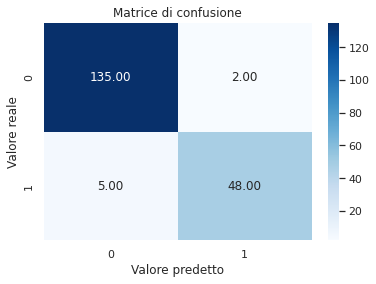

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")

In [ ]:
#Utilizzo della cross validation per controllare l'accuratezza del modello
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = x_train, y = y_train, cv = 5)
print("L'accuratezza media è {:.4f} %".format(accuracies.mean()*100))
print("La deviazione standard è {:.4f} ".format(accuracies.std()))

L'accuratezza media è 94.4589 %
La deviazione standard è 0.0237 


### Applicazione di un Voting Classifier
Il voting classifier è un metodo di ensemble learning che consente di combinare insieme più modelli (diversi) e poi scegliere la predizione guardando cosa predice la maggioranza (**hard voting**) oppure utilizzando un voto pesato con la sicurezza che ha ogni modello nelle sue predizioni (**soft voting**).

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('knn', KNeighborsClassifier(n_neighbors = 1)),
        ('lr', LogisticRegression(C=0.2)),
        ('rf', RandomForestClassifier(n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], max_features=CV_rfc.best_params_['max_features'], criterion=CV_rfc.best_params_['criterion'])),
        ('svc', SVC(C = svm_cv.best_params_['C'], gamma = svm_cv.best_params_['gamma'], probability=True)),
        ('xg', XGBClassifier(**CV_xgb.best_params_))
    ], voting='soft'
)
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                             ('lr', LogisticRegression(C=0.2)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=16,
                                                     n_estimators=20)),
                             ('svc',
                              SVC(C=1.700001, gamma=1.500001,
                                  probability=True)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

In [ ]:
y_pred_vot=voting_clf.predict(x_test)
print(classification_report(y_test, y_pred_vot))

print("Punteggio nel train: {:.4f}%".format(voting_clf.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(voting_clf.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       137
        True       1.00      0.89      0.94        53

    accuracy                           0.97       190
   macro avg       0.98      0.94      0.96       190
weighted avg       0.97      0.97      0.97       190

Punteggio nel train: 97.7543%
Punteggio nel test: 96.8421%


Text(30.5, 0.5, 'Valore reale')

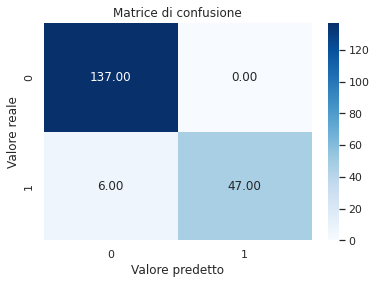

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_vot)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")

### Applicazione di uno Stacking Classifier
Per lo stacking nella versione più semplice si hanno tanti modelli base usati per predirre e poi un meta-modello (spesso la regressione logistica) che cerca di imparare a combinare le predizioni base nel miglior modo possibile

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('knn', KNeighborsClassifier(n_neighbors = 1)),
    ('dtc',DecisionTreeClassifier(max_depth=CV_dtc.best_params_['max_depth'], min_samples_leaf=CV_dtc.best_params_['min_samples_leaf'], criterion=CV_dtc.best_params_['criterion'])),
    #('rf', RandomForestClassifier(n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], max_features=CV_rfc.best_params_['max_features'], criterion=CV_rfc.best_params_['criterion'])),
    ('svc', SVC(C = svm_cv.best_params_['C'], gamma = svm_cv.best_params_['gamma'], probability=True)),
    ('xg', XGBClassifier(**CV_xgb.best_params_))
]

stk_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(C=0.2),cv=10
)
stk_clf.fit(x_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                               ('dtc',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=15)),
                               ('svc',
                                SVC(C=1.700001, gamma=1.500001,
                                    probability=True)),
                               ('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1,
                                              early_stopping_round...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=7,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   final_estimator=LogisticRegression(C=0.2))

In [ ]:
y_pred_stk = stk_clf.predict(x_test)
print(classification_report(y_test, y_pred_stk))

print("Punteggio nel train: {:.4f}%".format(clf.score(x_train, y_train)*100))
print("Punteggio nel test: {:.4f}%".format(clf.score(x_test, y_test)*100))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       137
        True       1.00      0.89      0.94        53

    accuracy                           0.97       190
   macro avg       0.98      0.94      0.96       190
weighted avg       0.97      0.97      0.97       190

Punteggio nel train: 97.7543%
Punteggio nel test: 96.8421%


Text(30.5, 0.5, 'Valore reale')

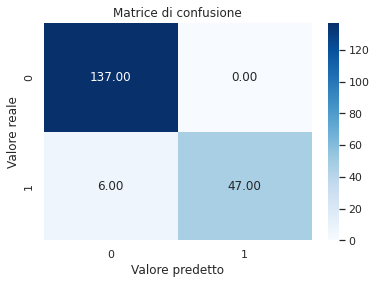

In [ ]:
#Matrice di confusione
cm = confusion_matrix(y_test, y_pred_stk)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")

## Rete neurale Keras

La rete neurale (multi-layer perceptron) è stata implementata utilizzando `Keras` (package basato su `Tensorflow`). 


Ci sono diversi parametri tra i quali:
- il numer di layers e di neuroni;
- lo schema di inizializzazione dei pesi e bias(es. Glorot Uniform)
- la funzione loss, che è quella per confrontare l'output della rete con il target, per i compiti di classificazione binaria si può utilizzare `binary_crossentropy`;
- la funzione di attivazione, utile per inserire un elemento di non linearità, che definisce l'output di un neurone. Per gli strati hidden spesso si usano tanh o ReLu e suoi derivati.
Per l'ultimo neurone di output la funzione sigmoide comprime i valori tra 0 e 1, utile per i compiti di classifciazione binaria e il valore di output può essere interpretato come probabilità;
- l'ottimizzatore, ovvero l'algortimo da usare per minimizzare la loss. Tra i più usati ci sono Adam, RMSprop e sgd.
> Un iperparametro importante dell'ottimizzatore è il learning rate: se è troppo piccolo può impiegare diverso tempo prima della convergenza o può fermarsi in un minimo locale; mentre se è troppo grande può rimbalzare troppo e non fermarsi nel minimo globale.



##### **Overfitting e metodi di riduzione**
L'overfitting si ha quando la rete non riesce bene a generalizzare bene le informazioni dati e si allinea troppo coi dati di training a cui consegue, per i dati di validazione o di test, ha un incremento della loss o un calo dell'accuracy.

Per ridurre l'overfitting ci sono diverse strategie come:
*   ridurre il numero di layers e neuroni sopratutto per dataset piccoli;
*   usare dei layers di Dropout (con valori tra 0.2 e 0.5) per azzerare casualmente certi neuroni, tra i metodi più usati. es: `model.add(Dropout(0.3))`;
*   early stopping, consente di interrompere la rete per certe condizioni, ad esempio se per n turni per la funzione loss coi dati di validazione sta aumentando. es:`EarlyStopping(monitor=’val_loss’, patience=5)`
*   regolarizzazione l1 o l2, per vincolare i valori possibili per i pesi.





##### **Tuning degli iperparametri**
Il tuning degli iperparametri (learning rate, funzioni di attivazione, ottimizzatore, funzione di loss, numero di epochs, numero di batch) può servire per trovare nello spazio dei parametri quelli che danno una performance migliore.
Tra i metodi per ottenerli ci sono:


*   Il trasformare la rete neurale in un KerasClassifier (di scikit-learn) e poi utilizzare GridSearchCV o RandomizedSearchCV;
*   l'uso di KerasTuner o Optuna;
*   usare metodi neuroevolutivi come un algoritmo genetico che parte da una popolazione di reti neuronali con set di parametri diversi e via via seleziona negativamente le reti neurali meno performanti e "fa riprodurre" quelle più performanti;





In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#In seguito a diversi cicli e ottimizzazione, la rete neurale ottimale prevede: uno strato di 16 neuroni, uno da 5 e uno da output
model = Sequential([
Dense(16, input_dim = 17, activation='gelu'), #funzione di attivazione gelu
Dense(16, activation = 'gelu'),
Dense(1, activation = 'sigmoid'), #per il nodo di output usiamo la sigmoide ottimale per i problemi di classificazione binaria
])

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])#usiamo la funzione di costo binary_crossentropy per problemi di classificazione binaria
#usiamo adam come ottimizzatore per la discesa del gradiente della rete neurale
history=model.fit(x_train, y_train, validation_split = 0.33, epochs = 70, batch_size = 20, verbose = 0)

6/6 [==============================] - 0s 3ms/step - loss: 0.2365 - accuracy: 0.8947
accuracy: 89.47%
6/6 [==============================] - 0s 3ms/step


Text(30.5, 0.5, 'Valore reale')

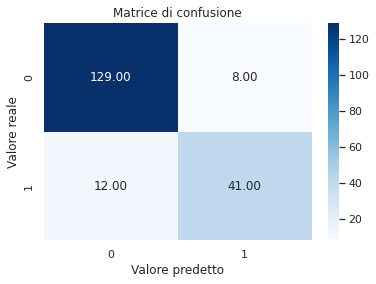

In [ ]:
#valutazione modello
scores = model.evaluate(x_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))
y_pred_model = model.predict(x_test)
y_pred_model = (y_pred_model > 0.5)
#matrice di confusione
cm = confusion_matrix(y_test, y_pred_model)
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice di confusione")
plt.xlabel("Valore predetto")
plt.ylabel("Valore reale")

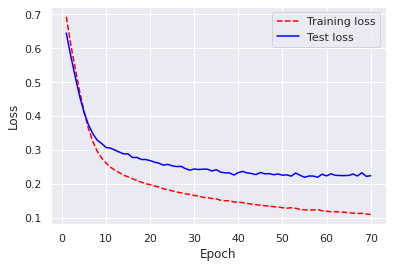

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
training_loss=history.history["loss"]
test_loss=history.history["val_loss"]
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss","Test loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
print(history.history.keys())

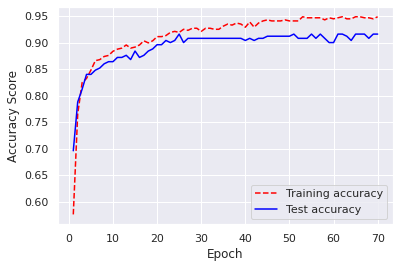

In [ ]:
training_acc=history.history["accuracy"]
test_acc=history.history["val_accuracy"]
plt.plot(epoch_count, training_acc, "r--")
plt.plot(epoch_count, test_acc, "b-")
plt.legend(["Training accuracy","Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

## Confronto tra i modelli
Una volta allenati e testati i differenti modelli, si possono confrontare tra loro.

#### Curva ROC
La curva ROC (Receiver Operating Characteristic) è uno schema usato per confrontare gli output ottenuti da classificatori binari (ottimizzato per dataset bilanciati). 

Lungo i due assi si possono rappresentare la recall e (1-(TN/(TN+FP))), rispettivamente rappresentati da True Positive Rate (TPR, frazione di veri positivi) e False Positive Rate (FPR, frazione di falsi positivi). 
In altre parole, si studiano i rapporti fra istanze true positive (hit rate) e false positive.

L'integrale della curva definisce l'AUC (Area Under the Curve). 
- Un modello eccellente ha un'AUC vicina a 1, il che significa che ha una buona misura di separabilità;
- Un modello scadente ha un'AUC vicina a 0, il che significa che ha la peggiore misura di separabilità. In realtà, significa che il risultato è reciproco. Sta predicendo gli 0 come 1 e gli 1 come 0;
- Un modello che non ha alcuna capacità di separazione delle classi ha AUC pari a 0,5;

6/6 [==============================] - 0s 5ms/step


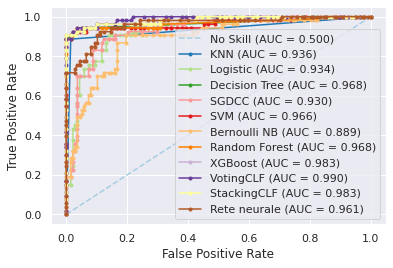

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#Per prima cosa si genera un classificatore (No Skill) che predice sempre la classe più frequente (in questo caso 0)
ns_probs = [0 for _ in range(len(y_test))]

# Elaboro le probabilità predette da ogni modello (su cui è possibile farlo, ovvero niente percettrone perché è single layer e apparentemente non si può)
lr_probs = logreg.predict_proba(x_test)
xgb_probs = xgb.predict_proba(x_test)
svm_probs = svm.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
rfc_probs = rfc.predict_proba(x_test)
bnb_probs = bnb.predict_proba(x_test)
voting_clf_probs = voting_clf.predict_proba(x_test)
stk_clf_probs = stk_clf.predict_proba(x_test)
dtc_probs = dtc.predict_proba(x_test)
model_probs = model.predict(x_test) #Vale solo perché ha una funzione sigmoide in output

#Mantengo le probabilità della classe positiva
lr_probs = lr_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
svm_probs = svm_probs[:, 1]
knn_probs = knn_probs[:, 1]
rfc_probs = rfc_probs[:, 1]
bnb_probs = bnb_probs[:, 1]
voting_clf_probs = voting_clf_probs[:, 1]
dtc_probs = dtc_probs[:,1]
stk_clf_probs = stk_clf_probs[:,1]

# Calcolo i valori dell'AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
bnb_auc = roc_auc_score(y_test, bnb_probs)
model_auc = roc_auc_score(y_test, model_probs)
voting_clf_auc = roc_auc_score(y_test, voting_clf_probs)
stk_clf_auc = roc_auc_score(y_test,stk_clf_probs)
dtc_auc = roc_auc_score(y_test,dtc_probs)

#SGDC non fornisce una probabilità bensì utilizza una funzione di decisione per cui si calcola la distanza dalla decision_function
score_roc = sgdc.decision_function(x_test)
sgdc_fpr, sgdc_tpr, thresholds = roc_curve(y_test, score_roc)
sgdc_auc = auc(sgdc_fpr, sgdc_tpr)

# Calcolo le curve ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
bnb_fpr, bnb_tpr, _ = roc_curve(y_test, bnb_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)
voting_clf_fpr, voting_clf_tpr, _ = roc_curve(y_test,voting_clf_probs)
stk_clf_fpr, stk_clf_tpr,_ = roc_curve(y_test,stk_clf_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test,dtc_probs)

# Plot delle curve ROC per ciascun modello

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)'%ns_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUC = %0.3f)'% knn_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.3f)'% lr_auc)
plt.plot(dtc_fpr,dtc_tpr,marker='.',label='Decision Tree (AUC = %0.3f)'%dtc_auc)
plt.plot(sgdc_fpr, sgdc_tpr,marker = '.',label='SGDCC (AUC = %0.3f)' %sgdc_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUC = %0.3f)'%svm_auc)
plt.plot(bnb_fpr, bnb_tpr, marker='.', label='Bernoulli NB (AUC = %0.3f)'%bnb_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest (AUC = %0.3f)'%rfc_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (AUC = %0.3f)'%xgb_auc)
plt.plot(voting_clf_fpr,voting_clf_tpr,marker='.',label='VotingCLF (AUC = %0.3f)'%voting_clf_auc)
plt.plot(stk_clf_fpr, stk_clf_tpr,marker='.',label='StackingCLF (AUC = %0.3f)'%stk_clf_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='Rete neurale (AUC = %0.3f)'%model_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

#### Curva Precision-Recall per i modelli

La curva Precision-Recall è un altro metodo utilizzato per valutare le prestazioni degli algoritmi di classificazione binaria (solitamente usata per dataset fortemente sbilanciati).


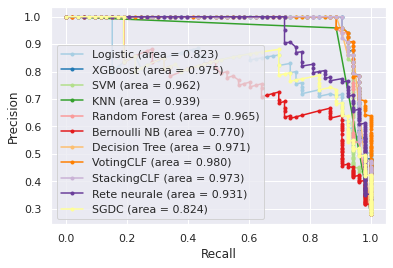

In [ ]:
#Curva precision-recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Calcolo le curve Precision-Recall
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
bnb_precision, bnb_recall, _ = precision_recall_curve(y_test, bnb_probs)
dtc_precision, dtc_recall, _ = precision_recall_curve(y_test,dtc_probs)
voting_clf_precision, voting_clf_recall, _ = precision_recall_curve(y_test,voting_clf_probs)
stk_clf_precision, stk_clf_recall, _ = precision_recall_curve(y_test,stk_clf_probs)
model_precision, model_recall, _ = precision_recall_curve(y_test, model_probs)

# Calcolo i punteggi AUC
lr_auc = auc(lr_recall, lr_precision)
xgb_auc = auc(xgb_recall, xgb_precision)
svm_auc = auc(svm_recall, svm_precision)
knn_auc = auc(knn_recall, knn_precision)
rfc_auc = auc(rfc_recall, rfc_precision)
bnb_auc = auc(bnb_recall, bnb_precision)
model_auc = auc(model_recall, model_precision)
dtc_auc = auc(dtc_recall,dtc_precision)
voting_clf_auc = auc(voting_clf_recall,voting_clf_precision)
stk_clf_auc = auc(stk_clf_recall,stk_clf_precision)

#SGDC non ha la funzione predict_proba quindi non posso calcolare la curva Precision-Recall in maniera classica ma si può utilizzare decision_function
score_pr = sgdc.decision_function(x_test)
sgdc_precision, sgdc_recall, _ = precision_recall_curve(y_test, score_pr)
sgdc_auc = auc(sgdc_recall, sgdc_precision)

# Plot delle curve Precision-Recall per ciascun modello
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic (area = %0.3f)' % lr_auc)
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost (area = %0.3f)' % xgb_auc)
#plt.plot(lgbm_recall, lgbm_precision, marker='.', label='LightGBM (area = %0.3f)' % lgbm_auc)
plt.plot(svm_recall, svm_precision, marker='.', label='SVM (area = %0.3f)' % svm_auc)
plt.plot(knn_recall, knn_precision, marker='.', label='KNN (area = %0.3f)' % knn_auc)
plt.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest (area = %0.3f)' % rfc_auc)
plt.plot(bnb_recall, bnb_precision, marker='.', label='Bernoulli NB (area = %0.3f)' % bnb_auc)
plt.plot(dtc_recall, dtc_precision, marker='.', label='Decision Tree (area = %0.3f)' % dtc_auc)
plt.plot(voting_clf_recall, voting_clf_precision, marker='.', label='VotingCLF (area = %0.3f)' % voting_clf_auc)
plt.plot(stk_clf_recall, stk_clf_precision, marker='.', label='StackingCLF (area = %0.3f)' % stk_clf_auc)
plt.plot(model_recall, model_precision, marker='.', label='Rete neurale (area = %0.3f)' % model_auc)
plt.plot(sgdc_recall, sgdc_precision, marker='.', label='SGDC (area = %0.3f)' % sgdc_auc)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In ultimo vediamo un grafico con l'accuracy nel test di ciascun modello a confronto per stabilire quale sia il migliore. Inoltre, confrontiamo i valori ottenuti con quelli dello studio di riferimento per i modelli in comune. 

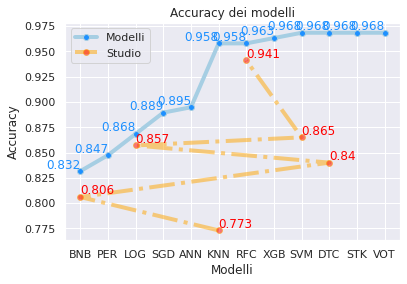

In [ ]:
lr_acc = accuracy_score(y_test, y_pred_log)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
svm_acc = accuracy_score(y_test, y_pred_svm)
knn_acc = accuracy_score(y_test, y_pred_knn)
rfc_acc = accuracy_score(y_test, y_pred_rfc)
bnb_acc = accuracy_score(y_test, y_pred_bnb)
dtc_acc = accuracy_score(y_test, y_pred_dtc)
percep_acc = accuracy_score(y_test, y_pred_perceptron)
voting_clf_acc = accuracy_score(y_test, y_pred_vot)
stk_clf_acc = accuracy_score(y_test, y_pred_stk)
sgdc_acc = accuracy_score(y_test, y_pred_sgdc)
model_acc = accuracy_score(y_test, y_pred_model)

# Grafico a linee con le accuracy dei modelli
x_labels = ['LOG', 'XGB','SVM', 'KNN', 'RFC', 'BNB', 'DTC', 'PER','ANN','STK','VOT','SGD']
y_values = [lr_acc, xgb_acc, svm_acc, knn_acc, rfc_acc, bnb_acc, dtc_acc, percep_acc, model_acc,voting_clf_acc,stk_clf_acc,sgdc_acc]

acc_studio = {'LOG':0.857,'KNN':0.773,'SVM':0.865,'BNB':0.806,'DTC':0.840,'RFC':0.941}

acc_modelli = dict(zip(x_labels, y_values))
acc_modelli = dict(sorted(acc_modelli.items(), key=lambda item: item[1], reverse=False))
acc_studio = dict(sorted(acc_studio.items(), key=lambda item: item[1], reverse=False))
for a,b in acc_modelli.items():
    plt.text(a, b, str(round(b,3)), fontsize=12, color='dodgerblue', horizontalalignment='right', verticalalignment='bottom')
for a,b in acc_studio.items():
    plt.text(a, b, str(round(b,3)), fontsize=12, color='red', horizontalalignment='left', verticalalignment='bottom')

plt.plot(acc_modelli.keys(), acc_modelli.values(), marker='.', markerfacecolor='dodgerblue', markersize=12, linewidth=4)
plt.plot(acc_studio.keys(), acc_studio.values(), marker='.', markerfacecolor='red', markersize=12, linewidth=4, linestyle='dashdot',color='orange',alpha=0.5)
plt.xlabel('Modelli')
plt.ylabel('Accuracy')
plt.title('Accuracy dei modelli')
plt.legend(['Modelli', 'Studio'], loc='upper left')
plt.show()

## Conclusioni


Utilizzando insieme tipologie di dati notoriamente connessi al diabete (es. età, familiarità, BMI) e altri dati legati allo stile di vita degli individui è possibile effettuare una previsione affidabile del diabete. Da ciò si evince che agendo su tali fattori, è possibile ridurre il rischio della patologia. 

Ulteriormente, i modelli applicati si sono dimostrati molto accurati, anche in maniera migliore di quanto presentato nell'articolo e rispetto ad altri studi clinici famosi (vedi il Pima Indian Dataset). Sicuramente tali modelli necessitano di allenamenti con dataset di dimensioni maggiori ma questo è un buon punto di partenza.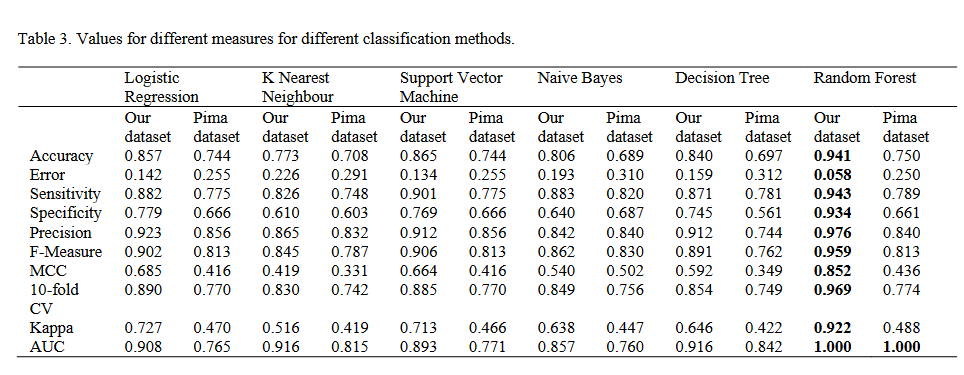

### Autori
- Brenna Nicholas
- Capozzi Davide
- Gotta Davide
- Sequino Angela
- Verteramo Luca
